# **1. Entendimiento del Negocio**

La unidad de psicología de un hospital universitario quiere entender los patrones y efectos sobre el uso de SmartPhones entre los jóvenes, haciendo un enfoque especial en entender niveles de adicción al uso de este tipo de dispositivos. La intención es entonces conocer cuáles pueden ser los efectos en cuanto a la posibilidad de desarrollar niveles de adicción.

# **2. Enfoque Analítico**

Desarrollar un experimento de clasificación que permita determinar los niveles de adicción de jóvenes con un nivel de desempeño superior al 85%

# **3. Requerimiento de Datos**

- Datos comportamentales
- Datos demográficos
- Datos de hábitos
- Nivel de adicción

# **4. Recolección de los Datos**

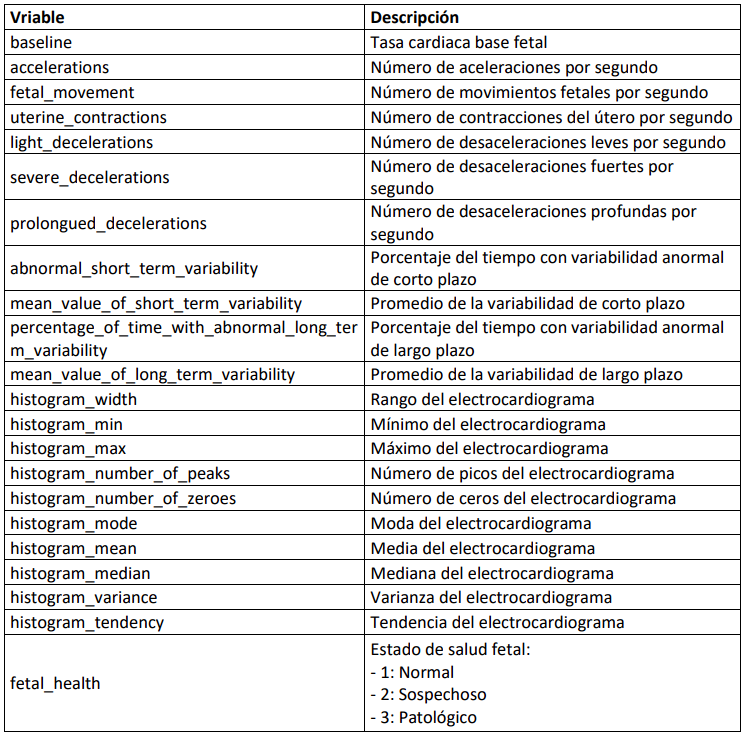

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Importación de los datos
data = pd.read_csv('datos_caso_2.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


    # **5. Entendimiento de los datos**

- Datos nulos
- Estadísticas univariada, bivariada y multivariada
- Desbalance de y

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Identificación de datos nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

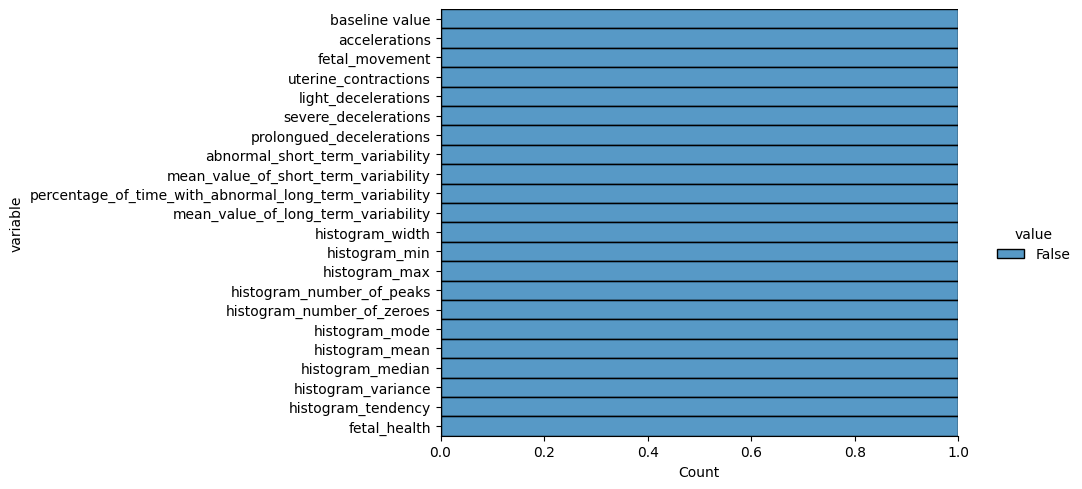

In [4]:
#Visualizar la proporción de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

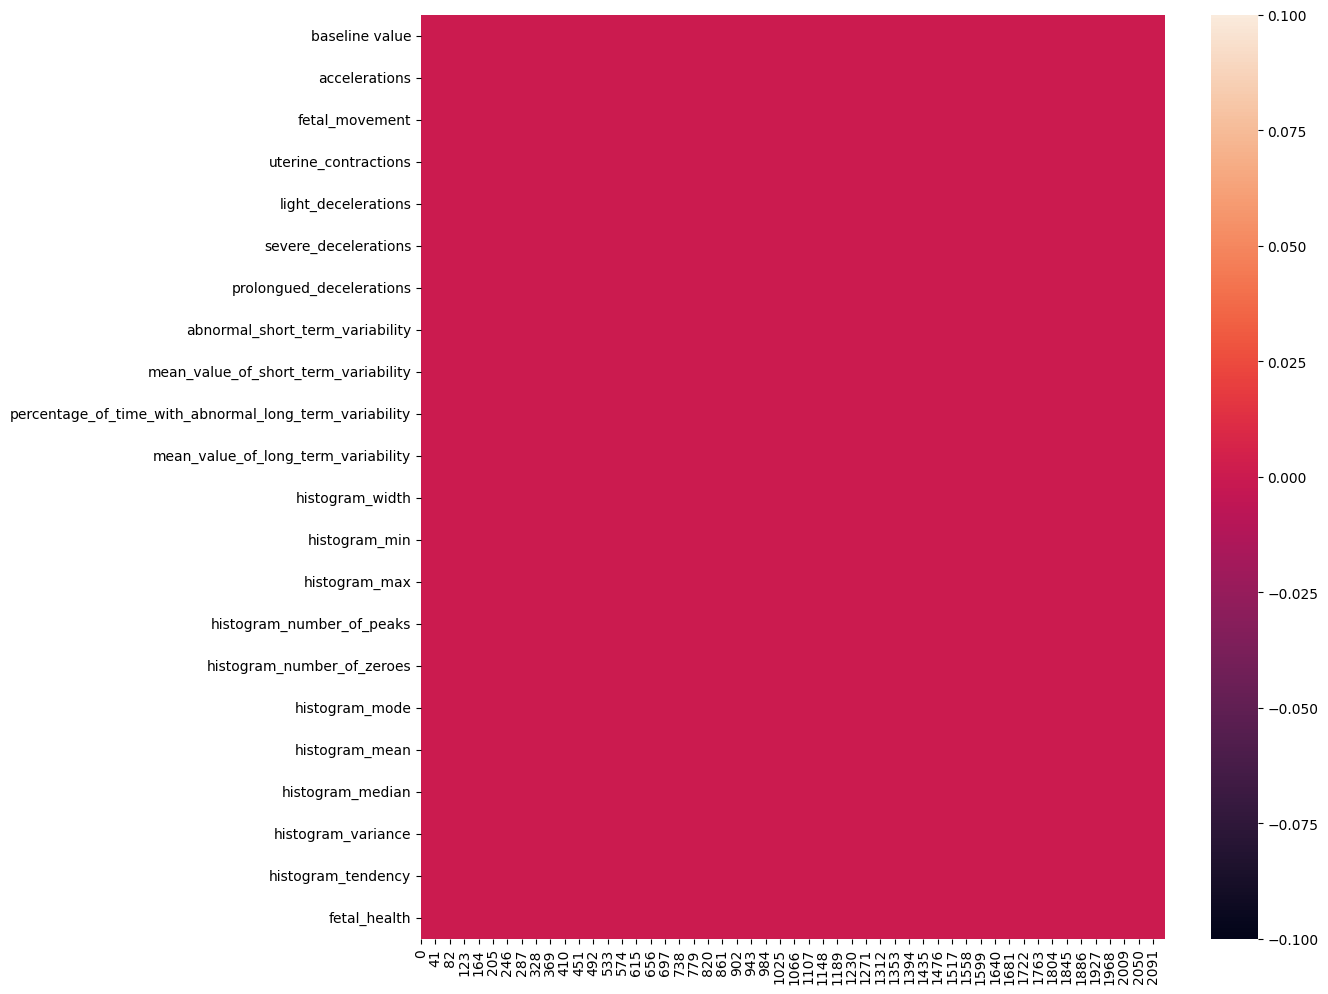

In [5]:
plt.figure(figsize = (12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

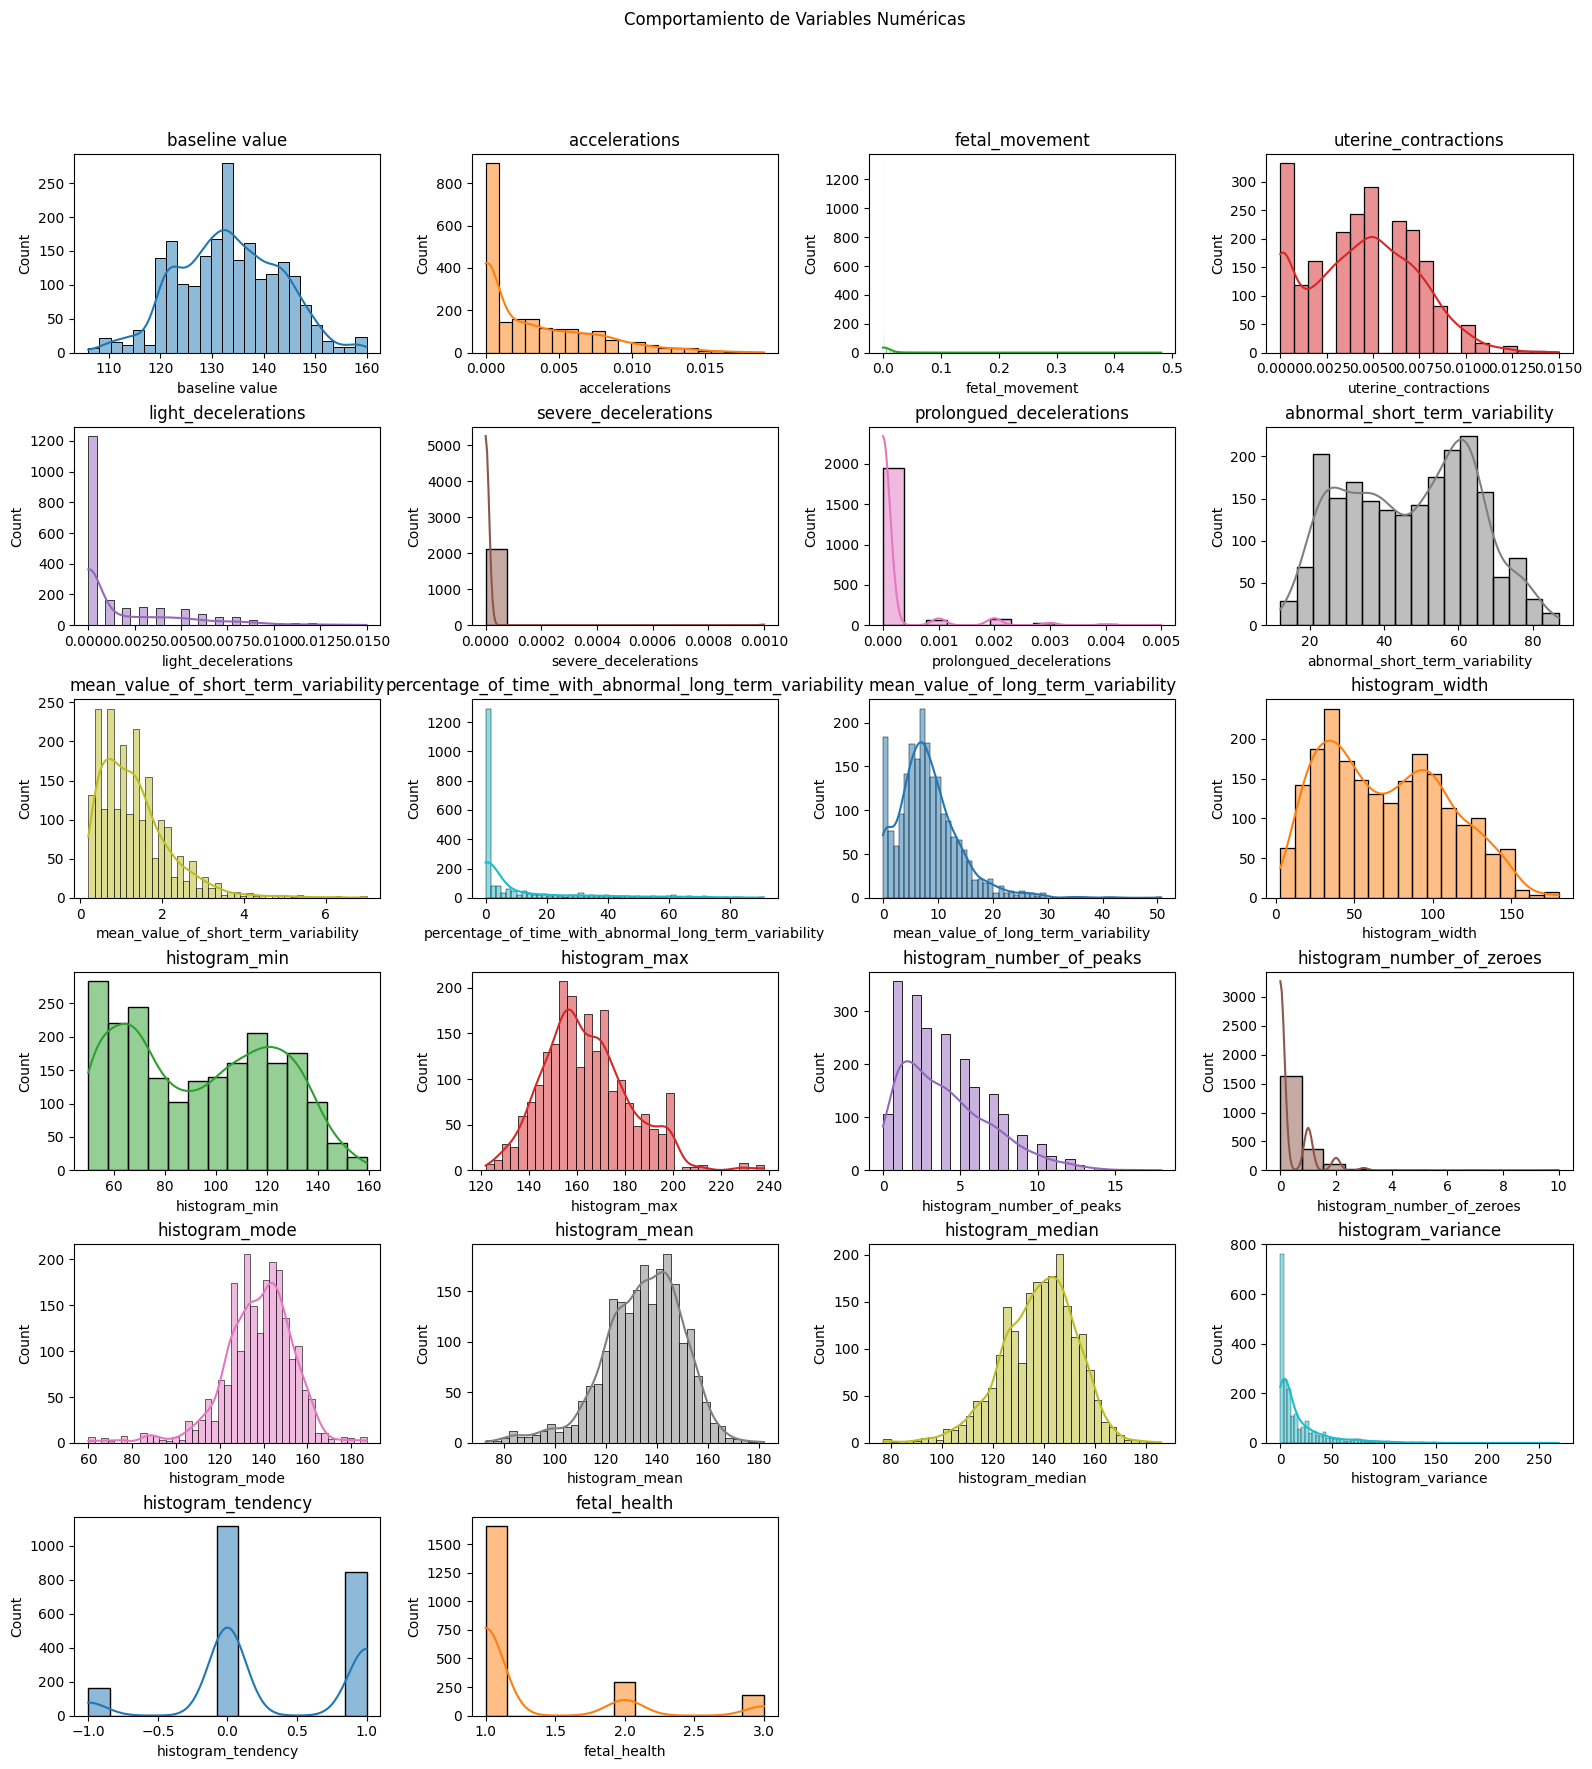

In [6]:
import matplotlib.pyplot as plt

#Exploración univariada de los datos
##Para datos numéricos: histogramas de frecuencia
##Para datos categóricos: gráficos de torta

###HISTOGRAMAS DE FRECUENCIA
fig, ax = plt.subplots(6, 4, figsize = (16, 18))  # 6x4=24 subplots for 22 columns
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 8)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
# Hide unused axes if any
for j in range(len(num_col), len(ax)):
    ax[j].set_visible(False)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

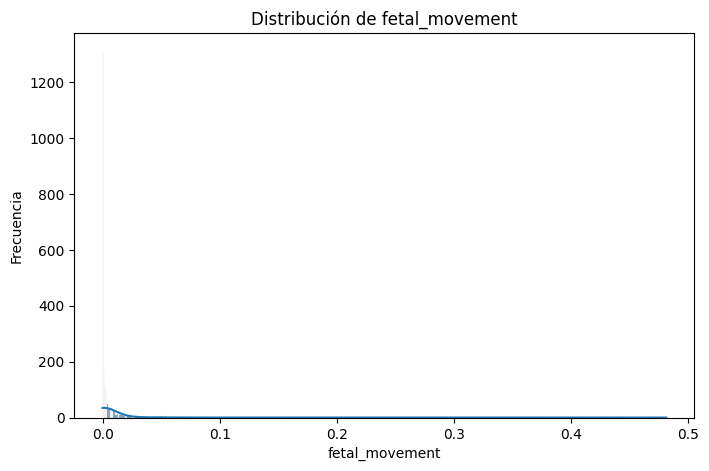

count    2126.000000
mean        0.009481
std         0.046666
min         0.000000
25%         0.000000
50%         0.000000
75%         0.003000
max         0.481000
Name: fetal_movement, dtype: float64


In [7]:
# Exploración univariada de fetal_movement
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(8, 5))
sb.histplot(data=data, x='fetal_movement', kde=True)
plt.title('Distribución de fetal_movement')
plt.xlabel('fetal_movement')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas
print(data['fetal_movement'].describe())

# Si es categórica, puedes ver los conteos
if data['fetal_movement'].dtype == 'object':
    print(data['fetal_movement'].value_counts())

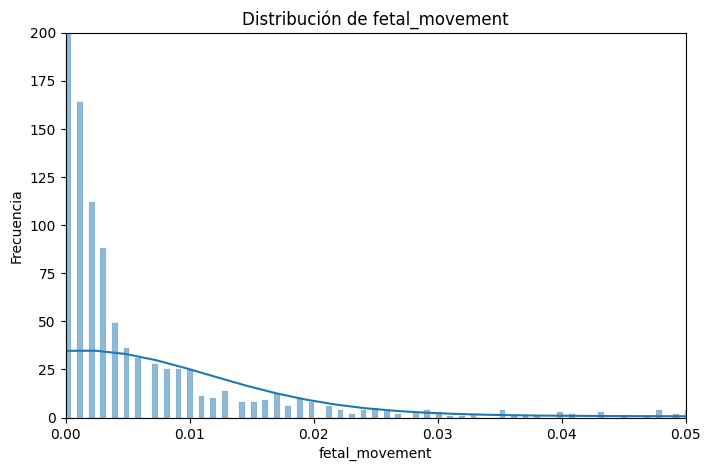

In [8]:
# Graficar la distribución de la variable fetal_movement con límites personalizados
plt.figure(figsize=(8, 5))
sb.histplot(data=data, x='fetal_movement', kde=True)
plt.title('Distribución de fetal_movement')
plt.xlabel('fetal_movement')
plt.ylabel('Frecuencia')
plt.xlim(0, 0.05)
plt.ylim(0, 200)
plt.show()

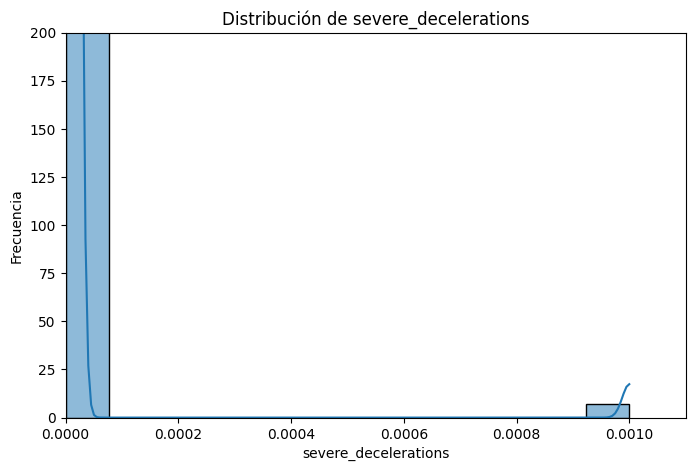

count    2126.000000
mean        0.000003
std         0.000057
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.001000
Name: severe_decelerations, dtype: float64


In [9]:
# Graficar la distribución de la variable fetal_movement con límites personalizados
plt.figure(figsize=(8, 5))
sb.histplot(data=data, x='severe_decelerations', kde=True)
plt.title('Distribución de severe_decelerations')
plt.xlabel('severe_decelerations')
plt.ylabel('Frecuencia')
plt.xlim(0, 0.0011)
plt.ylim(0, 200)
plt.show()

# Estadísticas descriptivas
print(data['severe_decelerations'].describe())

<Axes: title={'center': 'Distribución de severe_decelerations'}, ylabel='count'>

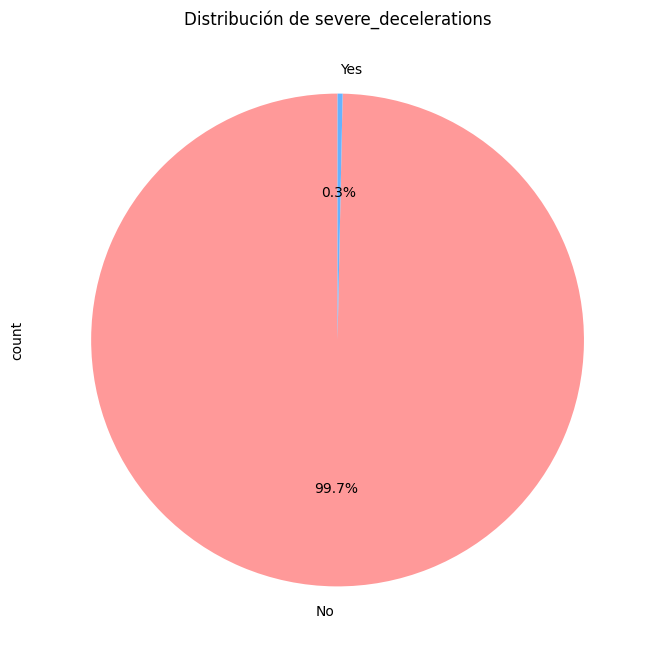

In [10]:
# Hacer grafico de torta para severe_decelerations
severe_counts = data['severe_decelerations'].value_counts()
severe_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],
    labels=['No', 'Yes'],
    title='Distribución de severe_decelerations',
    figsize=(8, 8)
)

Podemos borrar severe_decelerations porque solo tenemos valores de 0 y de 0.001, y la categoría de cero es mayor al 85%

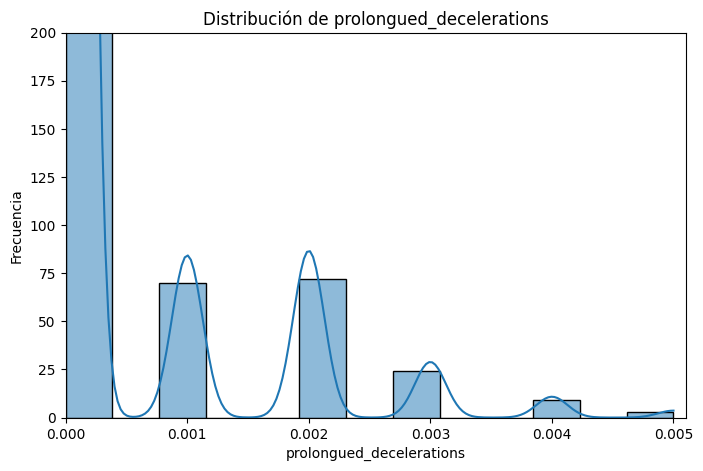

count    2126.000000
mean        0.000159
std         0.000590
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.005000
Name: prolongued_decelerations, dtype: float64


In [11]:
# Graficar la distribución de la variable fetal_movement con límites personalizados
plt.figure(figsize=(8, 5))
sb.histplot(data=data, x='prolongued_decelerations', kde=True)
plt.title('Distribución de prolongued_decelerations')
plt.xlabel('prolongued_decelerations')
plt.ylabel('Frecuencia')
plt.xlim(0, 0.0051)
plt.ylim(0, 200)
plt.show()

# Estadísticas descriptivas
print(data['prolongued_decelerations'].describe())

<Axes: title={'center': 'prolongued_decelerations'}, ylabel='count'>

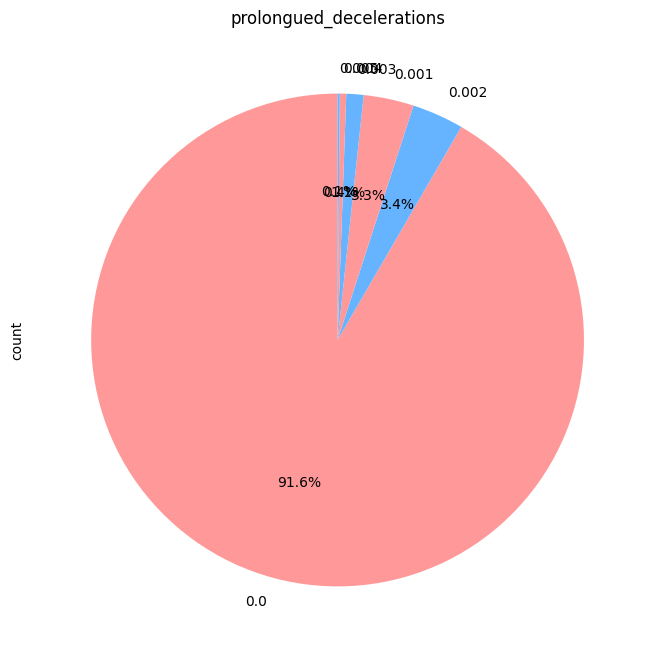

In [12]:
# Hacer grafico de torta para severe_decelerations
severe_counts = data['prolongued_decelerations'].value_counts()
severe_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],
    title='prolongued_decelerations',
    figsize=(8, 8)
)

In [20]:
# Copiar el dataset excluyendo las variables indicadas - Borrando por categorias mayor a 85%
data_limpio = data.drop(columns=['prolongued_decelerations', 'severe_decelerations'])
data_limpio.head()
data_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   abnormal_short_term_variability                         2126 non-null   float64
 6   mean_value_of_short_term_variability                    2126 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  2126 non-null   float64
 8   mean_value_of_long_term_variability   

# **6. Preparación de los Datos**

- Eliminar variables que no son significativas
- Completar variables que cuentan con datos nulos
- Balancear y
- Transformar los datos para que sean usables por el modelo
- Separar en conjuntos de entrenamiento y prueba

Transformar de manera ordinal las variables categóricas con miras a imputar los datos. Para la imputación siempre utilizamos codificación ordinal. `["Rojo", "Verde", "Azul"] → [0, 1, 2].`

In [24]:
# data_transformed = pd.DataFrame(categorical_transformer.fit_transform(data_mod),
#                                columns = categorical_transformer.get_feature_names_out(),
#                                index = data_mod.index).rename(columns = lambda x: x.removeprefix('ordinalencoder__')).rename(columns = lambda x: x.removeprefix('remainder__'))
# data_transformed

data_transformed = data_limpio

In [25]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   abnormal_short_term_variability                         2126 non-null   float64
 6   mean_value_of_short_term_variability                    2126 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  2126 non-null   float64
 8   mean_value_of_long_term_variability   

In [26]:
# No es necesario hacer esto porque no tenemos nulos
# Imputación por vecindad
'''
knn_imputer = sklearn.impute.KNNImputer(n_neighbors = 5) ******** Por qué ponemos 5
data_knn_df = pd.DataFrame(knn_imputer.fit_transform(data_transformed).round(),
                           columns = data_transformed.columns,
                           index = data_transformed.index)
data_knn_df.info()
'''

'\nknn_imputer = sklearn.impute.KNNImputer(n_neighbors = 5) ******** Por qué ponemos 5\ndata_knn_df = pd.DataFrame(knn_imputer.fit_transform(data_transformed).round(),\n                           columns = data_transformed.columns,\n                           index = data_transformed.index)\ndata_knn_df.info()\n'

In [27]:
# No es necesario hacer esto porque no tenemos nulos
# Imputación recursiva
'''
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
recursive_imputer = sklearn.impute.IterativeImputer(estimator = LinearRegression(),
                                                    initial_strategy = 'mean',
                                                    max_iter = 10)
data_recursive_df = pd.DataFrame(recursive_imputer.fit_transform(data_transformed).round(),
                                 columns = data_transformed.columns,
                                index = data_transformed.index)
data_recursive_df.info()
'''

"\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.experimental import enable_iterative_imputer\nrecursive_imputer = sklearn.impute.IterativeImputer(estimator = LinearRegression(),\n                                                    initial_strategy = 'mean',\n                                                    max_iter = 10)\ndata_recursive_df = pd.DataFrame(recursive_imputer.fit_transform(data_transformed).round(),\n                                 columns = data_transformed.columns,\n                                index = data_transformed.index)\ndata_recursive_df.info()\n"

In [28]:
# Es para mostrar el data set sin valores nulos
'''
data_imputed = data_recursive_df.copy()
data_imputed[categorical_cols] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X = data_recursive_df[categorical_cols]))
data_imputed
'''

'\ndata_imputed = data_recursive_df.copy()\ndata_imputed[categorical_cols] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X = data_recursive_df[categorical_cols]))\ndata_imputed\n'

In [29]:
data_imputed = data_transformed
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   abnormal_short_term_variability                         2126 non-null   float64
 6   mean_value_of_short_term_variability                    2126 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  2126 non-null   float64
 8   mean_value_of_long_term_variability   

## Balanceo de Objetivo -> Y -- Solo se hace en clasificación

#### Sub muestreo (Data Reduction)
Llevar la o las clases de mayor frecuencia al tamaño de la menor frecuencia

#### Remuestreo (Data Augmentation)
Llevar la o las clases de menor frecuencia al tamaño de la mayor frecuencia
- Replicación -> La que vamos a usar
- FDP/FMP (SMOTE/SmoteTonek)

In [30]:
# Balancear la Y, necesitamos extraer de la fuente de datos cada una de las clases que tiene la Y
data_normal = data_imputed[data_imputed['fetal_health'] == 1]
data_sospechoso = data_imputed[data_imputed['fetal_health'] == 2]
data_patologico = data_imputed[data_imputed['fetal_health'] == 3]

print(f'El tamaño de la clase Normal es: {data_normal.shape}')
print(f'El tamaño de la clase Sospechoso es: {data_sospechoso.shape}')
print(f'El tamaño de la clase Patológico es: {data_patologico.shape}')

El tamaño de la clase Normal es: (1655, 20)
El tamaño de la clase Sospechoso es: (295, 20)
El tamaño de la clase Patológico es: (176, 20)


In [31]:
# Esto es un re-muestreo (resampling) para balancear clases.
data_sospechoso_re = data_sospechoso.sample(data_normal.shape[0], replace = True)
data_patologico_re = data_patologico.sample(data_normal.shape[0], replace = True)
data_balanced = pd.concat([data_normal, data_sospechoso_re, data_patologico_re])
data_balanced.reset_index(drop=True, inplace=True)
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          4965 non-null   float64
 1   accelerations                                           4965 non-null   float64
 2   fetal_movement                                          4965 non-null   float64
 3   uterine_contractions                                    4965 non-null   float64
 4   light_decelerations                                     4965 non-null   float64
 5   abnormal_short_term_variability                         4965 non-null   float64
 6   mean_value_of_short_term_variability                    4965 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  4965 non-null   float64
 8   mean_value_of_long_term_variability   

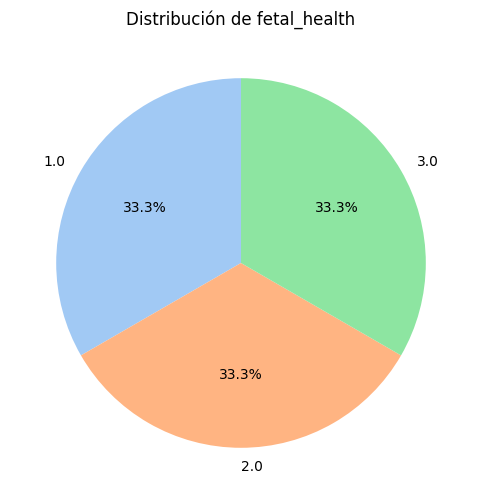

In [32]:

# Graficar diagrama de pie
plt.figure(figsize=(6, 6))
data_balanced['fetal_health'].astype('object').value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sb.color_palette('pastel'))
plt.title('Distribución de fetal_health')
plt.ylabel('')
plt.show()

En clasificación transformamos las X, le aplicamos OneHotEnconder y el minmaxescaler

In [33]:
X = data_balanced.drop(columns = ['fetal_health'])
y = data_balanced['fetal_health']
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (4965, 19)
y shape: (4965,)


# 4 Paso: Transformación de las variables


In [34]:
# Aquí creamos el preprocessor para las variables numericas y categoricas
# Escala las variables numéricas a un rango entre 0 y 1
# el OneHotEncoder convierte las variables categóricas en variables binarias (0 o 1), una por cada categoría posible.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_col = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_col = X.select_dtypes(include = ['object']).columns.to_list()
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_col),
                                                  ('cat', cat_transformer, cat_col)],
                                                  remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['baseline value', 'accelerations',
                                  'fetal_movement', 'uterine_contractions',
                                  'light_decelerations',
                                  'abnormal_short_term_variability',
                                  'mean_value_of_short_term_variability',
                                  'percentage_of_time_with_abnormal_long_term_variability',
                                  'mean_value_of_long_term_variability',
                                  'histogram_width', 'histogram_min',
                                  'histogram_max', 'histogram_number_of_peaks',
                                  'histogram_number_of_zeroes',
                                  'histogram_mode', 'histogram_mean',
                                  'histogram_median', 'histogram_variance',
                                  'histogram_tendency']),
                                ('cat',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 [])])

In [35]:
X_pre = preprocessor.fit_transform(X)
# cod_cat = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col])
X_pro = pd.DataFrame(X_pre, columns = labels, index = X.index)
X_pro.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.481481,0.315789,0.000000,0.400000,0.200000,0.066667,0.279412,0.0,0.205128,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5
1,0.500000,0.157895,0.000000,0.533333,0.200000,0.053333,0.279412,0.0,0.264300,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5
2,0.518519,0.157895,0.000000,0.533333,0.200000,0.053333,0.323529,0.0,0.453649,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0
3,0.481481,0.368421,0.000000,0.533333,0.000000,0.053333,0.323529,0.0,0.392505,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0
4,0.462963,0.263158,0.149688,0.533333,0.200000,0.213333,0.176471,0.0,0.254438,0.355932,0.348624,0.275862,0.277778,0.0,0.590551,0.559633,0.550459,0.026022,1.0
5,0.462963,0.473684,0.461538,0.400000,0.133333,0.213333,0.191176,0.0,0.106509,0.474576,0.192661,0.310345,0.111111,0.0,0.637795,0.587156,0.587156,0.037175,1.0
6,0.444444,0.315789,0.848233,0.266667,0.333333,0.120000,0.308824,0.0,0.155819,0.587571,0.155963,0.448276,0.388889,0.0,0.653543,0.477064,0.532110,0.282528,0.5
7,0.444444,0.315789,0.790021,0.266667,0.266667,0.093333,0.308824,0.0,0.171598,0.587571,0.155963,0.448276,0.166667,0.0,0.582677,0.495413,0.513761,0.159851,0.5
8,0.444444,0.315789,0.916840,0.333333,0.333333,0.160000,0.279412,0.0,0.214990,0.689266,0.027523,0.482759,0.277778,0.0,0.653543,0.504587,0.559633,0.260223,1.0
9,0.444444,0.157895,0.937630,0.400000,0.266667,0.146667,0.250000,0.0,0.173570,0.542373,0.082569,0.310345,0.333333,0.0,0.574803,0.467890,0.477064,0.133829,1.0


In [36]:
from sklearn.model_selection import train_test_split
# Plantar semilla: np.random.seed(25), regresión lineal no usa aleatorios podemos obtener los coeficientes
X_train, X_test, y_train, y_test = train_test_split(X_pro, y, train_size=0.7, random_state=123)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')
# Mirar en la separación como quedó el balance de la variable objetivo (y) ya que esto es aleatorio y puede quedar mal. Es importante tener representación de todas las clases en cada conjunto

X_train shape: (3475, 19), y_train shape: (3475,)
X_test shape: (1490, 19), y_test shape: (1490,)


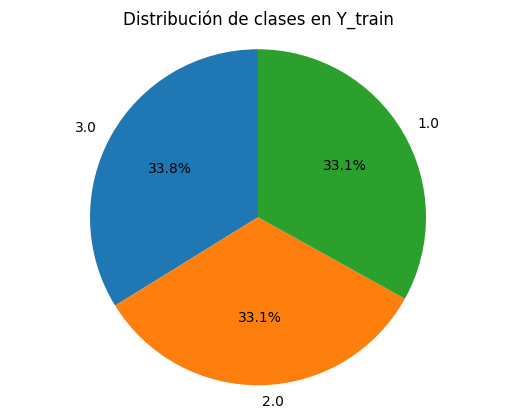

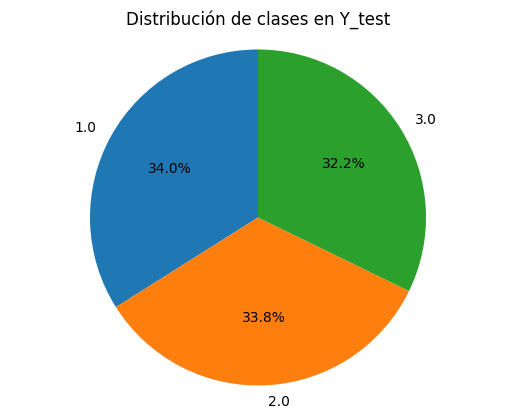

In [37]:
# Grafico de Y entrenamiento y Y validación
plt.pie(x = y_train.value_counts(),
        labels = y_train.value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribución de clases en Y_train')
plt.axis('equal')
plt.show()

plt.pie(x = y_test.value_counts(),
        labels = y_test.value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribución de clases en Y_test')
plt.axis('equal')
plt.show()

# Regresión logistica

In [38]:
# Regresión logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Teoricamente la regresión logistica solo tiene un hiperparámetro, pero cuando lo construimos podemos poner otro que es la penalización.

modelo_1 = LogisticRegression(solver='saga', random_state=123)
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_1 = GridSearchCV(estimator=modelo_1, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy') # cv son los folds, debe ser impar para que evitemos paridad, en scoring le decimos cual metrica de desempeño utilizar, ponemos F1 porque queremos modelos que sean capaces de estimar correctamte las tres clases y como el F1 mezcla el recall y la precisión nos sive. Pero en este caso no nos da porque F1 solito solo sirve para problemas de dos posibles clase, en este caso es de 3 clases. Todos los modelos están diseñados para trabajar con dos clases, para una clasificación multiclase existen dos aproximaciones: Uno contra uno y Uno contra Todos.
clf_1.fit(X_train, y_train) # 24 modelos y 5 experimentos por modelos


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=123, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [39]:
validation = pd.concat([pd.DataFrame(clf_1.cv_results_['params']),
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns=['accuracy'])], axis=1)
validation.sort_values(by='accuracy', ascending=False)


,C,penalty,accuracy
16,10.0000,l2,0.857266
12,1.0000,l1,0.854676
21,1000.0000,l1,0.852086
18,100.0000,l1,0.851799
22,1000.0000,l2,0.851799
15,10.0000,l1,0.850647
19,100.0000,l2,0.850647
13,1.0000,l2,0.844604
10,0.1000,l2,0.831367
9,0.1000,l1,0.827338


Entre mas grande sea el valor de C estoy dandole permiso para que se equivoque más.

In [40]:
modelo_1_final = clf_1.best_estimator_
modelo_1_final

LogisticRegression(C=10, random_state=123, solver='saga')

Metricas de Desempeño en Entrenamiento1
              precision    recall  f1-score   support

         1.0       0.94      0.87      0.90      1149
         2.0       0.80      0.84      0.82      1151
         3.0       0.86      0.88      0.87      1175

    accuracy                           0.86      3475
   macro avg       0.87      0.86      0.86      3475
weighted avg       0.87      0.86      0.86      3475



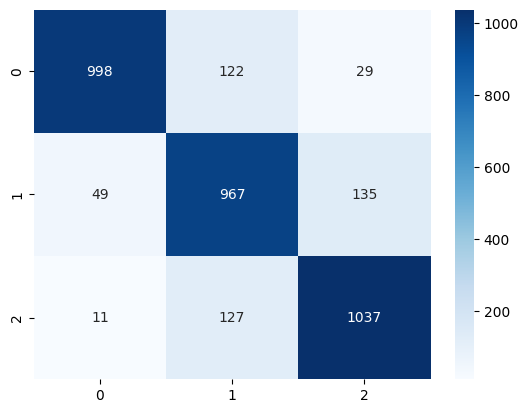

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_1_train = modelo_1_final.predict(X_train)
print('Metricas de Desempeño en Entrenamiento1')
print(classification_report(y_train, y_pred_1_train))
sb.heatmap(confusion_matrix(y_train, y_pred_1_train), annot=True, fmt='d', cmap='Blues')
plt.show()

Esto nos asegura que no está sobre ajustado pero no significa que sea un mejor modelo.

Metricas de Desempeño en validación
              precision    recall  f1-score   support

         1.0       0.93      0.86      0.89       506
         2.0       0.79      0.86      0.83       504
         3.0       0.89      0.88      0.88       480

    accuracy                           0.87      1490
   macro avg       0.87      0.87      0.87      1490
weighted avg       0.87      0.87      0.87      1490



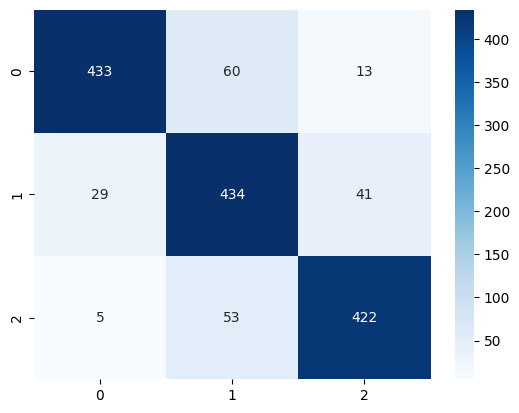

In [42]:
# Metricas de desempeño en validación
y_pred_test_1 = modelo_1_final.predict(X_test)
print('Metricas de Desempeño en validación')
print(classification_report(y_test, y_pred_test_1))
sb.heatmap(confusion_matrix(y_test, y_pred_test_1), annot=True, fmt='d', cmap='Blues')
plt.show()

# K vecinos más cercanos

Tiene un comportamiento sico sociológico.

Utiliza 2 hiperparámetros que son: **cantidad de vecinos: K** y la **Forma de distancia: Euclidiana (p-q)^2 o Manhattan |p-q|** *El valor para K TIENE que ser impar. El valor para K es un entero positivo que va hasta la cantidad de individuos.

Asociarse a los K vecimos donde la distancia sea mínima.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
modelo_2 = KNeighborsClassifier() # No tiene estado aleatorio porque utiliza la distancia entre puntos para clasificar
param_grid = {'n_neighbors': [3, 5, 7, 19, 21, 53], 'p': [1, 2]} # Distancia de milkovsky, 1 manhattan 2 euclidiana
clf_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted') # f1_weighted es para problemas multiclase
clf_2.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 19, 21, 53], 'p': [1, 2]},
             scoring='f1_weighted')

In [44]:
validation = pd.concat([pd.DataFrame(clf_2.cv_results_['params']),
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns=['f1'])], axis=1)
validation.sort_values(by='f1', ascending=False)


,n_neighbors,p,f1
0,3,1,0.954661
1,3,2,0.950646
2,5,1,0.936826
3,5,2,0.931559
4,7,1,0.924638
5,7,2,0.921558
6,19,1,0.890316
8,21,1,0.888372
7,19,2,0.884381
9,21,2,0.879116


Mejor modelo segun el f1 es

In [45]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final

KNeighborsClassifier(n_neighbors=3, p=1)

Metricas de Desempeño en Entrenamiento2
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97      1149
         2.0       0.95      1.00      0.97      1151
         3.0       0.99      1.00      1.00      1175

    accuracy                           0.98      3475
   macro avg       0.98      0.98      0.98      3475
weighted avg       0.98      0.98      0.98      3475



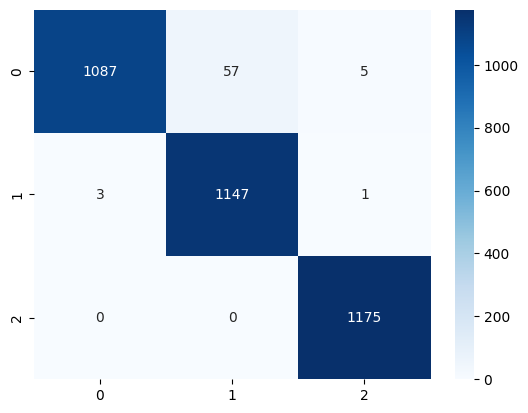

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_2_train = modelo_2_final.predict(X_train)
print('Metricas de Desempeño en Entrenamiento2')
print(classification_report(y_train, y_pred_2_train))
sb.heatmap(confusion_matrix(y_train, y_pred_2_train), annot=True, fmt='d', cmap='Blues')
plt.show()

Metricas de Desempeño en validación
              precision    recall  f1-score   support

         1.0       0.99      0.91      0.95       506
         2.0       0.93      0.98      0.95       504
         3.0       0.98      1.00      0.99       480

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.96      1490



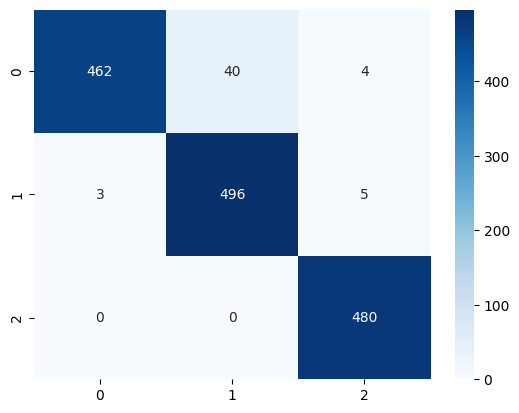

In [47]:
# Metricas de desempeño en validación
y_pred_test_2 = modelo_2_final.predict(X_test)
print('Metricas de Desempeño en validación')
print(classification_report(y_test, y_pred_test_2))
sb.heatmap(confusion_matrix(y_test, y_pred_test_2), annot=True, fmt='d', cmap='Blues')
plt.show()

# Arboles de Decisión


In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo_4 = DecisionTreeClassifier(random_state=123)
param_grid = {'criterion': ['log_loss', 'gini', 'entropy'], 'max_depth': [None, 5, 10, 15, 20], 'max_leaf_nodes': [None, 10, 20, 50], 'min_samples_split': [2, 3, 4]}
clf_4 = GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=3, scoring='f1_weighted')
clf_4.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['log_loss', 'gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_weighted')

In [49]:
validation = pd.concat([pd.DataFrame(clf_4.cv_results_['params']),
                        pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns=['f1'])], axis=1)
validation.sort_values(by='f1', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,f1
96,gini,15.0,NaN,2,0.972602
97,gini,15.0,NaN,3,0.972597
108,gini,20.0,NaN,2,0.971737
60,gini,NaN,NaN,2,0.971737
61,gini,NaN,NaN,3,0.971733
...,...,...,...,...,...
15,log_loss,5.0,10.0,2,0.891512
17,log_loss,5.0,10.0,4,0.891512
137,entropy,5.0,10.0,4,0.891512
136,entropy,5.0,10.0,3,0.891512


In [50]:
modelo_4_final = clf_4.best_estimator_
modelo_4_final

DecisionTreeClassifier(max_depth=15, random_state=123)

Metricas de Desempeño en Entrenamiento4
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1149
         2.0       1.00      1.00      1.00      1151
         3.0       1.00      1.00      1.00      1175

    accuracy                           1.00      3475
   macro avg       1.00      1.00      1.00      3475
weighted avg       1.00      1.00      1.00      3475



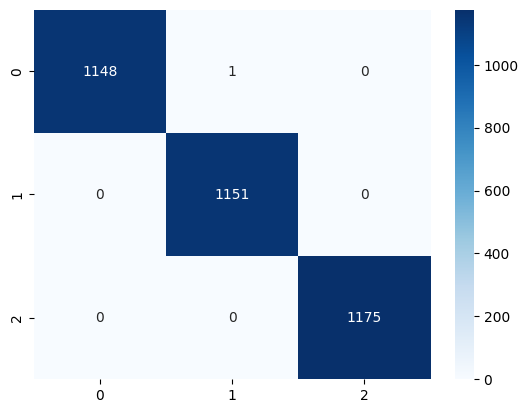

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_4_train = modelo_4_final.predict(X_train)
print('Metricas de Desempeño en Entrenamiento4')
print(classification_report(y_train, y_pred_4_train))
sb.heatmap(confusion_matrix(y_train, y_pred_4_train), annot=True, fmt='d', cmap='Blues')
plt.show()

Metricas de Desempeño en validación
              precision    recall  f1-score   support

         1.0       1.00      0.94      0.97       506
         2.0       0.95      1.00      0.97       504
         3.0       0.99      1.00      0.99       480

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



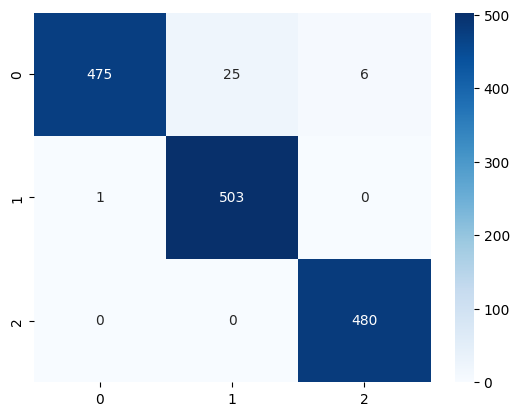

In [52]:
# Metricas de desempeño en validación
y_pred_test_4 = modelo_4_final.predict(X_test)
print('Metricas de Desempeño en validación')
print(classification_report(y_test, y_pred_test_4))
sb.heatmap(confusion_matrix(y_test, y_pred_test_4), annot=True, fmt='d', cmap='Blues')
plt.show()

Profundidad del árbol: 14
Numero de hojas: 109


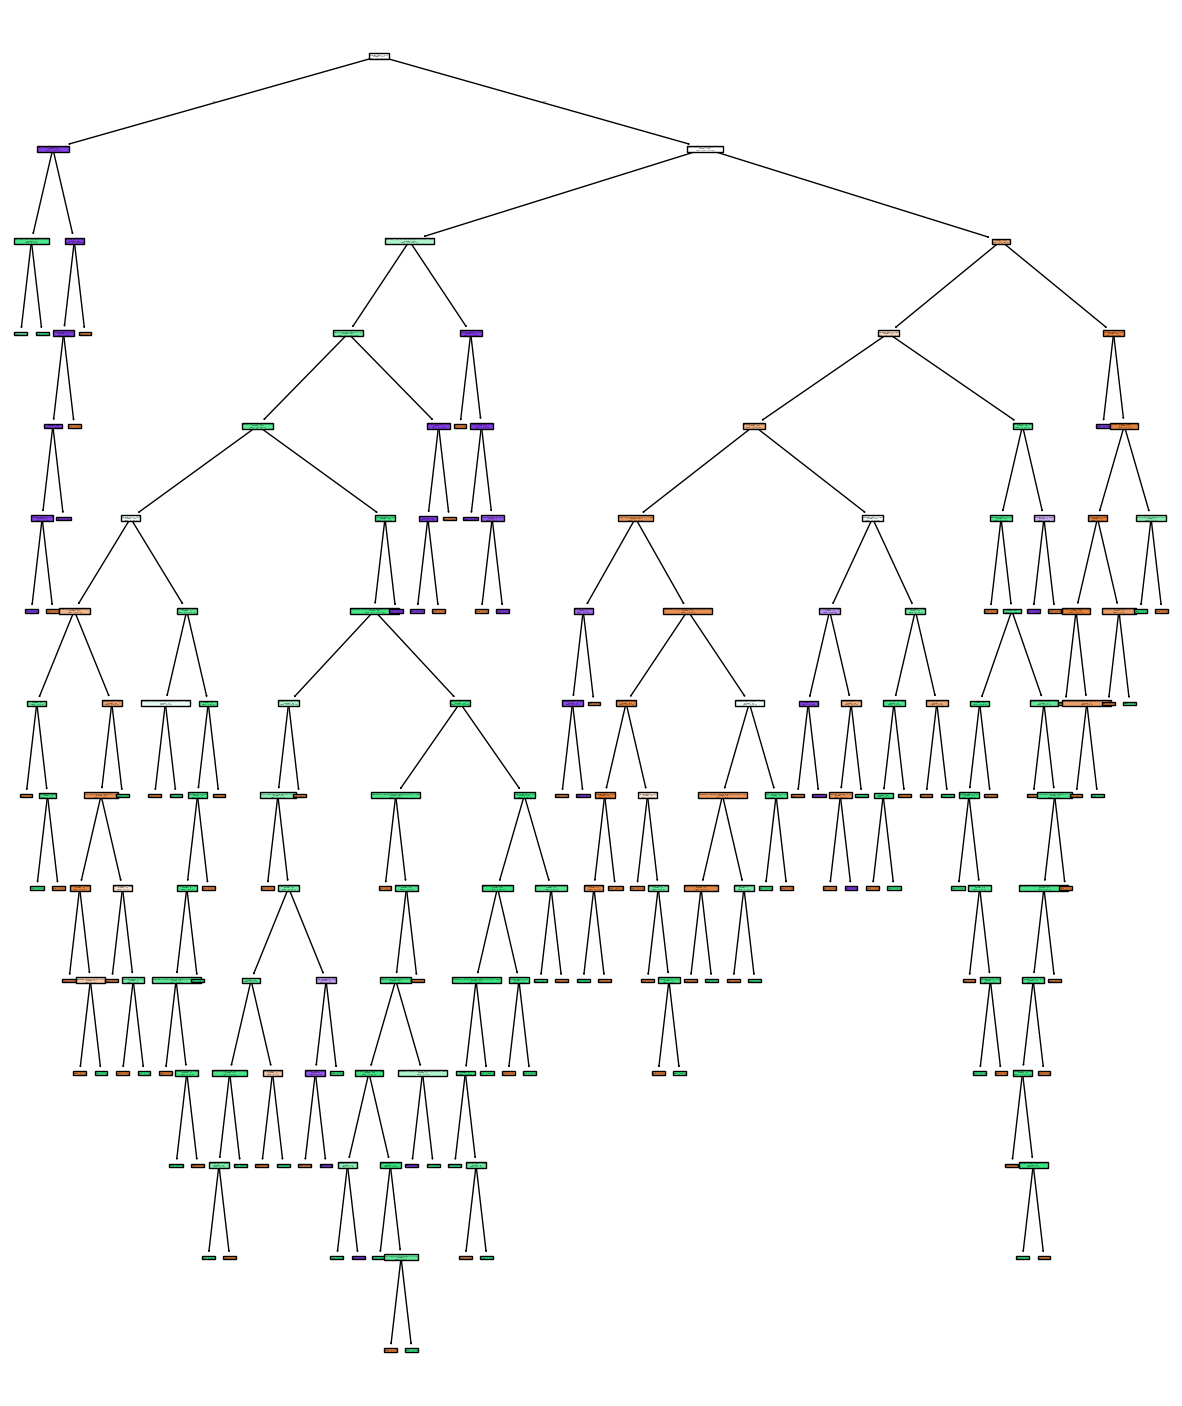

In [53]:
fig, ax = plt.subplots(figsize=(15, 18))
print(f'Profundidad del árbol: {modelo_4_final.get_depth()}\nNumero de hojas: {modelo_4_final.get_n_leaves()}')
plot = plot_tree(decision_tree=modelo_4_final, feature_names=labels, filled=True, impurity=False, ax=ax)

# Maquinas de soporte vectorial (SVM)

In [54]:
from sklearn.svm import SVC
modelo_3 = SVC(random_state=123)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4]}
clf_3 = GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=123),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1_weighted')

In [55]:
validation = pd.concat([pd.DataFrame(clf_3.cv_results_['params']),
                        pd.DataFrame(clf_3.cv_results_['mean_test_score'], columns=['f1'])], axis=1)
validation.sort_values(by='f1', ascending=False)


,C,degree,kernel,f1
93,1000.0000,4,poly,0.973762
86,1000.0000,2,rbf,0.972077
90,1000.0000,3,rbf,0.972077
94,1000.0000,4,rbf,0.972077
89,1000.0000,3,poly,0.969174
...,...,...,...,...
8,0.0001,4,linear,0.170883
11,0.0001,4,sigmoid,0.170883
10,0.0001,4,rbf,0.170883
14,0.0010,2,rbf,0.170883


In [56]:
modelo_3_final = clf_3.best_estimator_
modelo_3_final

SVC(C=1000, degree=4, kernel='poly', random_state=123)

Metricas de Desempeño en Entrenamiento3
              precision    recall  f1-score   support

         1.0       1.00      0.99      1.00      1149
         2.0       0.99      1.00      1.00      1151
         3.0       1.00      1.00      1.00      1175

    accuracy                           1.00      3475
   macro avg       1.00      1.00      1.00      3475
weighted avg       1.00      1.00      1.00      3475



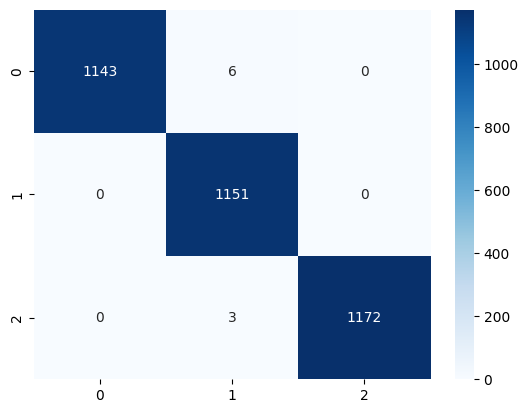

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_3_train = modelo_3_final.predict(X_train)
print('Metricas de Desempeño en Entrenamiento3')
print(classification_report(y_train, y_pred_3_train))
sb.heatmap(confusion_matrix(y_train, y_pred_3_train), annot=True, fmt='d', cmap='Blues')
plt.show()

Metricas de Desempeño en validación
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97       506
         2.0       0.95      1.00      0.97       504
         3.0       0.99      0.99      0.99       480

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



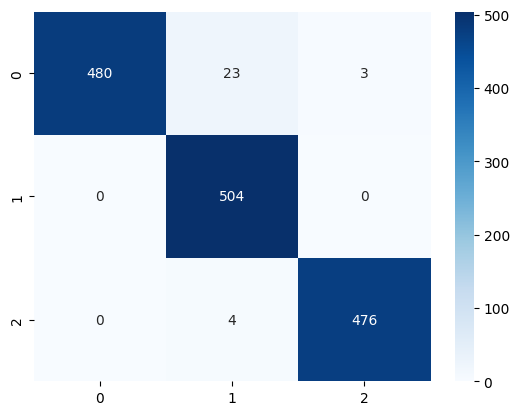

In [58]:
# Metricas de desempeño en validación
y_pred_test_3 = modelo_3_final.predict(X_test)
print('Metricas de Desempeño en validación')
print(classification_report(y_test, y_pred_test_3))
sb.heatmap(confusion_matrix(y_test, y_pred_test_3), annot=True, fmt='d', cmap='Blues')
plt.show()